In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pymongo
from utils.constants import HOST_IP

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
pd.read_csv("data/raw_data/spam_ham_dataset.csv")

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [2]:

dataset_name = "demo_dataset"
client = pymongo.MongoClient(HOST_IP, 27017)
db  = client[dataset_name]
col = db["spam_ham_dataset"]
df = pd.DataFrame(list(col.find()))

In [3]:
len(df)

5204

In [1]:
# df['label'].to_list()

In [1]:
from corpus_preprocess import datawhale_process

label
ham     3672
spam    1498
dtype: int64
['spam', 'ham']
2


4136it [00:00, 144036.74it/s]
1034it [00:00, 183015.16it/s]

77


In [3]:
df = datawhale_process.train_df
df

,_id,null,label,text,label_num
0,60f0f85a422e4bd1b75d3e4e,1460,ham,0 Subject: enron methanol ; meter # : 98...,0.0
1,60f0f859422e4bd1b75d2f2d,3704,spam,0 Subject: enron methanol ; meter # : 98...,1.0
2,60f0f85a422e4bd1b75d3ef2,4483,spam,0 Subject: enron methanol ; meter # : 98...,1.0
3,60f0f85a422e4bd1b75d3de1,3584,ham,0 Subject: enron methanol ; meter # : 98...,0.0
4,60f0f85a422e4bd1b75d3fa6,967,ham,0 Subject: enron methanol ; meter # : 98...,0.0
...,...,...,...,...,...
4131,60f0f85a422e4bd1b75d40fc,4292,spam,0 Subject: enron methanol ; meter # : 98...,1.0
4132,60f0f859422e4bd1b75d3390,2656,ham,0 Subject: enron methanol ; meter # : 98...,0.0
4133,60f0f85a422e4bd1b75d3cd8,5157,spam,0 Subject: enron methanol ; meter # : 98...,1.0
4134,60f0f85a422e4bd1b75d4274,498,ham,0 Subject: enron methanol ; meter # : 98...,0.0


In [8]:
df = datawhale_process.train_df
df['L_title'] = df['title'].apply(lambda x : len(x.split()))
max(df['L_title'].to_list())

/Users/derbysofti81/miniforge3/envs/pytorch/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


33

In [14]:
df['L_abstract'] = df['abstract'].apply(lambda x : len(x.split()))
max(df['L_abstract'].to_list())

/Users/derbysofti81/miniforge3/envs/pytorch/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


504

(array([1.4480e+03, 8.0340e+03, 1.4777e+04, 1.0701e+04, 4.2570e+03,
        7.5500e+02, 1.3000e+01, 6.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([  5. ,  54.9, 104.8, 154.7, 204.6, 254.5, 304.4, 354.3, 404.2,
        454.1, 504. ]),
 <BarContainer object of 10 artists>)

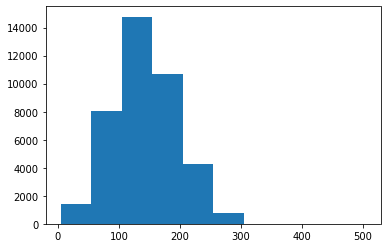

In [15]:
plt.hist(df['L_abstract'].to_list())

In [2]:
import pandas as pd
import pymongo
import numpy as np
from utils.constants import HOST_IP
from sklearn.model_selection import train_test_split
dataset_name = 'Datawhale_学术论文分类_数据集'
client = pymongo.MongoClient(HOST_IP, 27017)

db  = client[dataset_name]
col = db["train_data"]
df = pd.DataFrame(list(col.find())) # 

In [3]:
Labels = list((set(df['categories'].to_list())))

In [11]:
# !pip3 install matplotlib

(array([15935.,  3700.,  5153.,  3625.,  3140.,  3672.,  1839.,  1227.,
         1147.,   562.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

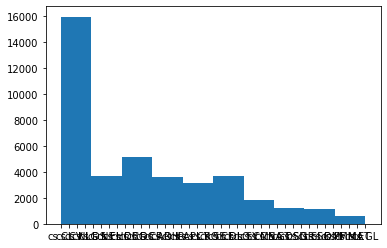

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['categories'].to_list())

In [4]:
import transformers
print(transformers.__version__)

4.8.1


In [5]:
from sklearn.model_selection import train_test_split
data_df = df.sample(frac=1).reset_index(drop=True)
cut_off = int(len(data_df)*.8)
train_df = data_df[:cut_off][0:10]
val_df = data_df[cut_off:]

# Dataset And Dataloader

In [6]:
from utils.model_utils import use_cuda, device
from models.text_lstm import LSTM
from corpus_preprocess.datawhale_process_bak import DatawhaleDataset
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data import Iterator
import torch
# train_iter = Iterator()

In [7]:
train_dataset = DatawhaleDataset(train_df['paperid'], train_df['title'], train_df['abstract'], train_df['categories'])
val_dataset = DatawhaleDataset(val_df['paperid'], val_df['title'], val_df['abstract'], val_df['categories'])
train_iter = iter(train_dataset)
val_iter = iter(val_dataset)
def yield_tokens(data_iter):
    for _, text, _, _ in data_iter:
        yield tokenizer(text)
tokenizer = get_tokenizer('basic_english')
def build_vocab(train_iter):
    vocab = build_vocab_from_iterator(yield_tokens(train_iter))
    return vocab
vocab = build_vocab(train_iter)

10lines [00:00, 31750.98lines/s]


In [22]:
text_pipeline = lambda x: token2id(tokenizer(x))  # vocab.stoi["who"]

label_pipeline = lambda x: Labels.index(x)

def token2id(tokens):
    # print(tokens)
    return [vocab.stoi[token] for token in tokens]

def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for _, title, _, label in batch:
         label_list.append(label_pipeline(label))
         processed_text = torch.tensor(text_pipeline(title), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    # text_list = torch.cat(text_list)
    text_list = torch.tensor(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)  



train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=False, collate_fn=collate_batch)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_batch)

In [23]:
 for item in train_dataloader:
     print(item)

TypeError: only integer tensors of a single element can be converted to an index

In [10]:
len(vocab)

74

In [11]:
from torch import nn
import torch
import torch.nn.functional as F

In [12]:
from torch import optim

In [13]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_dataloader,
          valid_loader = val_dataloader,
          num_epochs = 5,
        #   eval_every = len(train_iter) // 2,
          file_path = "/tmp",
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        for labels, titletext, titletext_len in train_loader:           
            labels = labels.to(device)
            titletext = titletext.to(device)
            titletext_len = titletext_len.to(device)
            output = model(titletext, titletext_len)

            loss = criterion(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    
                  # validation loop
                  for (labels, (title, title_len), (text, text_len), (titletext, titletext_len)), _ in valid_loader:
                      labels = labels.to(device)
                      titletext = titletext.to(device)
                      titletext_len = titletext_len.to(device)
                      output = model(titletext, titletext_len)

                      loss = criterion(output, labels)
                      valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/model.pt', model, optimizer, best_valid_loss)
                    save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')


model = LSTM(vocab).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=10)

RuntimeError: input must have 2 dimensions, got 1